In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import statsmodels.api as sm 

In [ ]:
#ucitavanje baze u DataFrame
df = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')

#Ispis prvih 5 vrta
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [ ]:
print("broj obelezja: ", df.shape[1])
print("broj uzoraka: ", df.shape[0])

broj obelezja:  18
broj uzoraka:  35064


In [ ]:
nullValuesCounter = df.isnull().sum().sum()
print('Ukupan broj nedostajucih podataka: ', nullValuesCounter)
nullValues = df.isnull().sum()
perc = nullValues/len(df)*100
print(perc)

Ukupan broj nedostajucih podataka:  5279
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.756788
PM10       1.223477
SO2        1.351814
NO2        1.879420
CO         4.999430
O3         3.345311
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.231006
WSPM       0.039927
station    0.000000
dtype: float64


In [ ]:
print(df['station'].unique())
df.drop(['station'], inplace= True, axis = 1)
df.drop(['No'], inplace = True, axis = 1)

['Guanyuan']


In [ ]:
#ako uzorak ima vise od 30% NaN vrednosti izbaci ga
df.dropna(thresh = df.shape[1]*0.3,axis = 0, inplace = True)
df['PM2.5'].fillna(df['PM2.5'].median(), inplace = True)
df['SO2'].fillna(df['SO2'].median(), inplace = True)
df['NO2'].fillna(df['NO2'].median(), inplace = True)
df['CO'].fillna(df['CO'].median(), inplace = True)
df['O3'].fillna(df['O3'].median(), inplace = True)
df['TEMP'] = df.groupby(df['month'])['TEMP'].apply(lambda x: x.fillna(x.median()))
df['PRES'] = df.groupby(df['month'])['PRES'].apply(lambda x: x.fillna(x.median()))
df['DEWP'] = df.groupby(df['month'])['DEWP'].apply(lambda x: x.fillna(x.median()))
df['RAIN'] = df.groupby(df['month'])['RAIN'].apply(lambda x: x.fillna(x.median()))
df['WSPM'] = df.groupby(df['month'])['WSPM'].apply(lambda x: x.fillna(x.median()))
df['wd'] = df.groupby(df['month'])['wd'].apply(lambda x: x.fillna(x.mode().iloc[0]))
df = df[df['PM10'].notna()]

print('Ukupan broj nedostajucih podataka: ', df.isnull().sum().sum())

Ukupan broj nedostajucih podataka:  0


In [ ]:
print(df.describe())

               year         month           day          hour         PM2.5  \
count  34635.000000  34635.000000  34635.000000  34635.000000  34635.000000   
mean    2014.661932      6.529955     15.724758     11.499293     82.773778   
std        1.175933      3.454000      8.804786      6.929705     80.702549   
min     2013.000000      1.000000      1.000000      0.000000      2.000000   
25%     2014.000000      4.000000      8.000000      5.000000     23.000000   
50%     2015.000000      7.000000     16.000000     11.000000     59.000000   
75%     2016.000000     10.000000     23.000000     18.000000    114.000000   
max     2017.000000     12.000000     31.000000     23.000000    680.000000   

               PM10           SO2           NO2            CO            O3  \
count  34635.000000  34635.000000  34635.000000  34635.000000  34635.000000   
mean     109.023303     17.558851     57.880251   1256.555132     55.396424   
std       91.573709     23.565290     34.980685   1

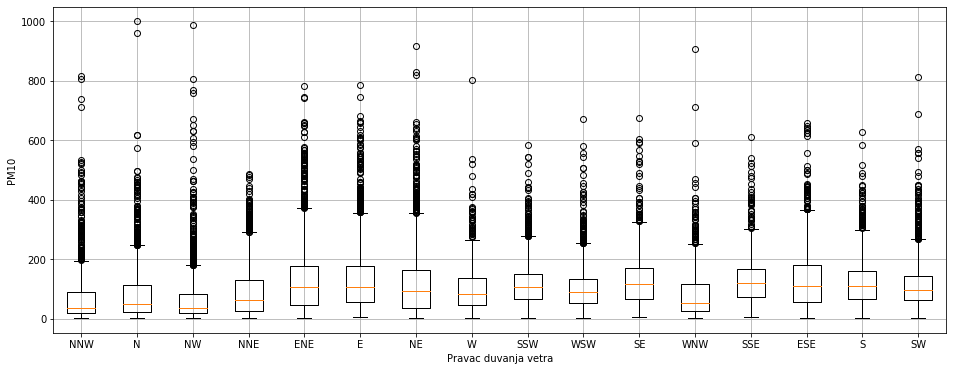

In [ ]:
#boxplot za korelaciju wd sa PM10
df_wd = df.set_index('wd')
wd_values = df_wd.index.unique()
plt.figure(figsize=(16, 6))
plt.boxplot([df_wd.loc['NNW', 'PM10'], df_wd.loc['N', 'PM10'], df_wd.loc['NW', 'PM10'], df_wd.loc['NNE', 'PM10'], df_wd.loc['ENE', 'PM10'], df_wd.loc['E', 'PM10'], df_wd.loc['NE', 'PM10'], df_wd.loc['W', 'PM10'], df_wd.loc['SSW', 'PM10'], df_wd.loc['WSW', 'PM10'], df_wd.loc['SE', 'PM10'], df_wd.loc['WNW', 'PM10'], df_wd.loc['SSE', 'PM10'], df_wd.loc['ESE', 'PM10'], df_wd.loc['S', 'PM10'], df_wd.loc['SW', 'PM10']])
plt.ylabel('PM10')
plt.xlabel('Pravac duvanja vetra')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], ['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE', 'WNW', 'SSE', 'ESE', 'S', 'SW'])
plt.grid()

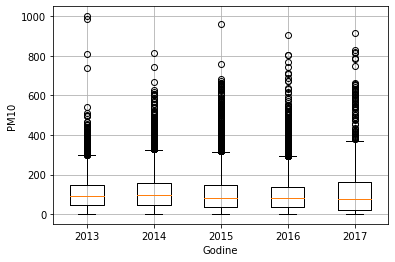

In [ ]:
#boxplot za year
df_year = df.set_index('year')
plt.figure()
plt.boxplot([df_year.loc['2013', 'PM10'], df_year.loc['2014', 'PM10'], df_year.loc['2015', 'PM10'], df_year.loc['2016', 'PM10'], df_year.loc['2017','PM10']])
plt.ylabel('PM10')
plt.xlabel('Godine')
plt.xticks([1, 2, 3, 4, 5], ['2013', '2014', '2015', '2016', '2017'])
plt.grid()

Text(0.5, 0, 'WSPM')

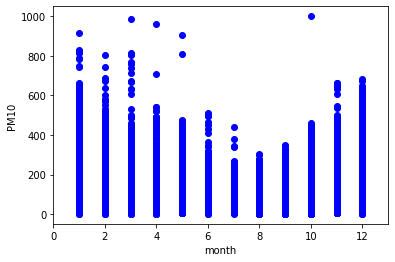

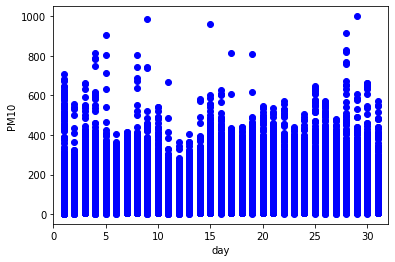

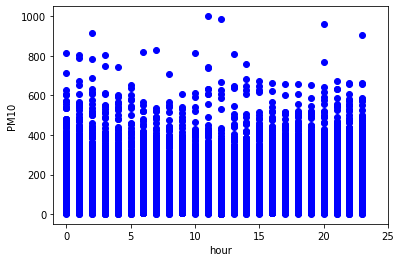

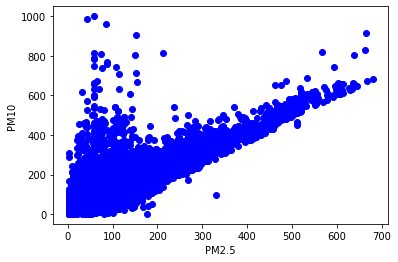

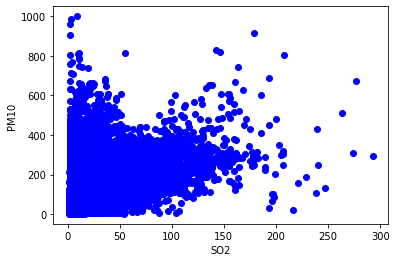

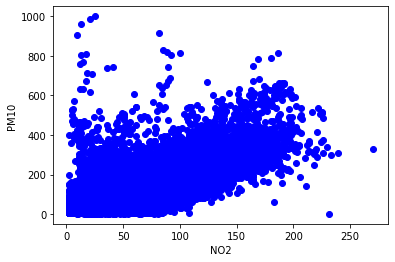

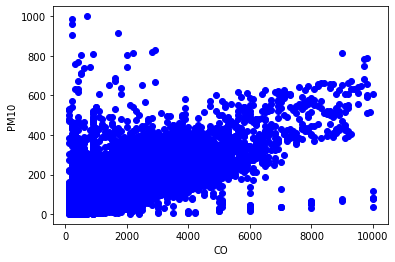

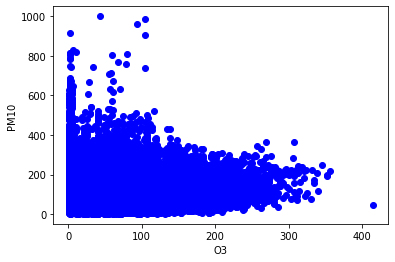

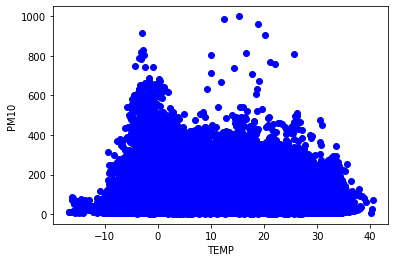

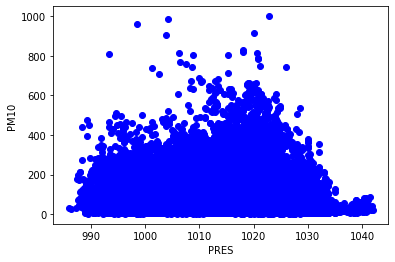

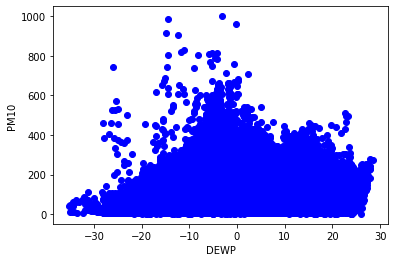

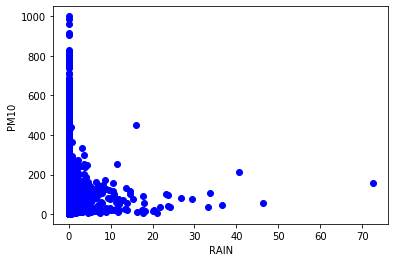

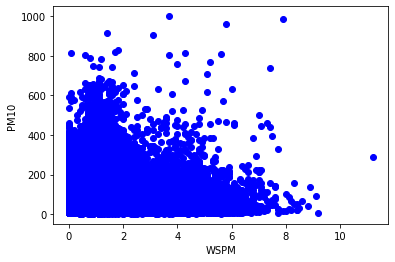

In [ ]:
plt.figure()
plt.scatter(df['month'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('month')
plt.xlim(0, 13)

plt.figure()
plt.scatter(df['day'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('day')
plt.xlim(0, 32)

plt.figure()
plt.scatter(df['hour'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('hour')
plt.xlim(-1, 25)

plt.figure()
plt.scatter(df['PM2.5'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('PM2.5')

plt.figure()
plt.scatter(df['SO2'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('SO2')

plt.figure()
plt.scatter(df['NO2'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('NO2')

plt.figure()
plt.scatter(df['CO'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('CO')

plt.figure()
plt.scatter(df['O3'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('O3')

plt.figure()
plt.scatter(df['TEMP'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('TEMP')

plt.figure()
plt.scatter(df['PRES'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('PRES')

plt.figure()
plt.scatter(df['DEWP'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('DEWP')

plt.figure()
plt.scatter(df['RAIN'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('RAIN')

plt.figure()
plt.scatter(df['WSPM'], df['PM10'], color = 'blue')
plt.ylabel('PM10')
plt.xlabel('WSPM')

Text(0.5, 1, 'Korelacija')

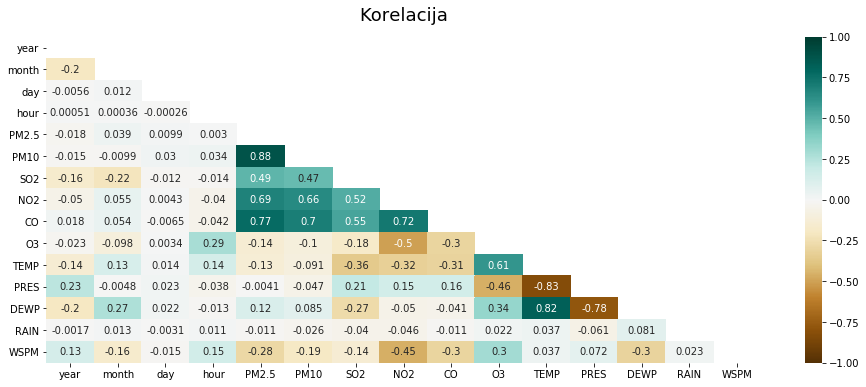

In [ ]:
plt.figure(figsize= (16,6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sb.heatmap(df.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
heatmap.set_title('Korelacija', fontdict = {'fontsize':18}, pad = 16)

In [ ]:
#resavanje problema outliera
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#print(df < (Q1 - 1.5*IQR)) or (df > (Q3 + 1.5*IQR))
rowsWithOutlier = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
rowsWithOutlier.shape[0]

df['CO'] = df['CO'].map(lambda i: np.log(i) if i > 0 else 0)
df['SO2'] = df['SO2'].map(lambda i: np.log(i) if i > 0 else 0)
df['TEMP'] = df['TEMP'].map(lambda i: np.log(i) if i > 0 else 0)

print('--------posle logaritmovanja--------')
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year        2.0
month       6.0
day        15.0
hour       13.0
PM2.5      91.0
PM10      109.0
SO2        19.0
NO2        47.0
CO       1000.0
O3         72.0
TEMP       20.1
PRES       16.8
DEWP       23.8
RAIN        0.0
WSPM        1.3
dtype: float64
--------posle logaritmovanja--------
year       2.000000
month      6.000000
day       15.000000
hour      13.000000
PM2.5     91.000000
PM10     109.000000
SO2        1.992430
NO2       47.000000
CO         1.098612
O3        72.000000
TEMP       2.012750
PRES      16.800000
DEWP      23.800000
RAIN       0.000000
WSPM       1.300000
dtype: float64


In [ ]:
#prebacivanje iz kategorickog obelezja u numericku, za obelezje wd
groupWd = df.groupby(df['wd']).mean()
groupWd = groupWd.sort_values(by=['PM10'])
for i in range(0, groupWd.shape[0]):
    df.loc[df['wd'] == groupWd.index[i], 'wd'] = i
df['wd'] = df['wd'].astype(int)  

In [ ]:
def model_evaluation(y_test, y_predicted,N, d):
    mse = mean_squared_error(y_test, y_predicted) 
    mae = mean_absolute_error(y_test, y_predicted) 
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)
    rss = np.sum((y_test-y_predicted)**2)
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    print('RSS', rss)
    res=pd.concat([pd.DataFrame(y_test .values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

In [ ]:
df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,4.0,2.639057,20.0,5.703782,69.0,0.0,1023.0,-18.8,0.0,1,4.4
1,2013,3,1,1,4.0,4.0,2.564949,17.0,5.703782,72.0,0.0,1023.2,-18.2,0.0,2,4.7
2,2013,3,1,2,3.0,3.0,2.302585,19.0,5.703782,69.0,0.0,1023.5,-18.2,0.0,1,5.6
3,2013,3,1,3,3.0,6.0,1.945910,24.0,5.991465,62.0,0.0,1024.5,-19.4,0.0,0,3.1
4,2013,3,1,4,3.0,6.0,1.609438,14.0,5.991465,71.0,0.0,1025.2,-19.5,0.0,2,2.0


In [ ]:
#standardizacija
def std(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train_std = scaler.transform(x_train)
    x_test_std = scaler.transform(x_test)
    x_train_std = pd.DataFrame(x_train_std)
    x_test_std = pd.DataFrame(x_test_std)
    x_train_std.columns = list(x.columns)
    x_test_std.columns = list(x.columns)
    x_train_std.head()
    return x_train_std, x_test_std

#obicna linearna regresija
def LinRegression(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 50)
    x_train_std, x_test_std = std(x_train, x_test)
    first_regression_model = LinearRegression(fit_intercept=True)
    first_regression_model.fit(x_train_std, y_train)
    y_predicted = first_regression_model.predict(x_test_std)
    model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])
    
x = df.drop(['PM10'], axis = 1)
y = df['PM10']
LinRegression(x, y)
df.head()

Mean squared error:  1596.8473207169995
Mean absolute error:  23.530618793775744
Root mean squared error:  39.960572076948544
R2 score:  0.8135478576186914
R2 adjusted score:  0.8134580876897645
RSS 5531479.118963687
        y      y_pred
0    28.0   63.617958
1   121.0  122.302310
2   141.0  105.713559
3   567.0  577.877476
4   139.0   66.058749
5   276.0  108.985329
6    15.0   28.499237
7    78.0   28.427581
8    86.0   53.707373
9    15.0   36.035138
10   18.0   30.724464
11   88.0   92.585480
12   52.0   56.166404
13  111.0  110.080290
14  112.0   75.911824
15   15.0   61.471111
16   42.0   59.268838
17   16.0   24.423346
18   40.0   45.441835
19  105.0   99.147206


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,4.0,2.639057,20.0,5.703782,69.0,0.0,1023.0,-18.8,0.0,1,4.4
1,2013,3,1,1,4.0,4.0,2.564949,17.0,5.703782,72.0,0.0,1023.2,-18.2,0.0,2,4.7
2,2013,3,1,2,3.0,3.0,2.302585,19.0,5.703782,69.0,0.0,1023.5,-18.2,0.0,1,5.6
3,2013,3,1,3,3.0,6.0,1.945910,24.0,5.991465,62.0,0.0,1024.5,-19.4,0.0,0,3.1
4,2013,3,1,4,3.0,6.0,1.609438,14.0,5.991465,71.0,0.0,1025.2,-19.5,0.0,2,2.0


In [ ]:
#selekcija
#p vrednost empirijski odredjena, pa onda ispitana pomocu RSS-a
def selection():
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    model_summ = model.summary()
    model.pvalues.sort_values(ascending = False)
    return model_summ

#obelezje C0 ima najvecu vrednost 0.803 -> njega prvo izbacujemo
print(selection())
x = x.drop('CO', axis = 1)
print(selection())

#izbacujemo obelezje hour 0.559
x = x.drop('hour', axis = 1)
print(selection())

#izbacujemo obelezje month 0.325
x = x.drop('month', axis = 1)
print(selection())

#izbacujemo obelezje wd  0.027
x = x.drop('wd', axis = 1)
print(selection())


                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 1.236e+04
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:26:00   Log-Likelihood:            -1.7677e+05
No. Observations:               34635   AIC:                         3.536e+05
Df Residuals:                   34622   BIC:                         3.537e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2120.9107    402.308     -5.272      0.0

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                 1.236e+04
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:26:01   Log-Likelihood:            -1.7677e+05
No. Observations:               34635   AIC:                         3.536e+05
Df Residuals:                   34622   BIC:                         3.537e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2120.9107    402.308     -5.272      0.0

In [ ]:
#p vrednost empirijski odredjena, pa onda ispitana pomocu RSS-a
#x = dropNotCorr(0.02, x, y)
LinRegression(x, y)
x.head()

Mean squared error:  1596.8473207169995
Mean absolute error:  23.530618793775744
Root mean squared error:  39.960572076948544
R2 score:  0.8135478576186914
R2 adjusted score:  0.8134580876897645
RSS 5531479.118963687
        y      y_pred
0    28.0   63.617958
1   121.0  122.302310
2   141.0  105.713559
3   567.0  577.877476
4   139.0   66.058749
5   276.0  108.985329
6    15.0   28.499237
7    78.0   28.427581
8    86.0   53.707373
9    15.0   36.035138
10   18.0   30.724464
11   88.0   92.585480
12   52.0   56.166404
13  111.0  110.080290
14  112.0   75.911824
15   15.0   61.471111
16   42.0   59.268838
17   16.0   24.423346
18   40.0   45.441835
19  105.0   99.147206


,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,2.639057,20.0,5.703782,69.0,0.0,1023.0,-18.8,0.0,1,4.4
1,2013,3,1,1,4.0,2.564949,17.0,5.703782,72.0,0.0,1023.2,-18.2,0.0,2,4.7
2,2013,3,1,2,3.0,2.302585,19.0,5.703782,69.0,0.0,1023.5,-18.2,0.0,1,5.6
3,2013,3,1,3,3.0,1.945910,24.0,5.991465,62.0,0.0,1024.5,-19.4,0.0,0,3.1
4,2013,3,1,4,3.0,1.609438,14.0,5.991465,71.0,0.0,1025.2,-19.5,0.0,2,2.0


In [ ]:
def PolyFeat(x_train_std, x_test_std, degree):
    #degree default == 2
    if degree == 2:
        poly = PolynomialFeatures(degree = degree,interaction_only=True, include_bias=False)
    else:
        poly = PolynomialFeatures(degree = degree,interaction_only=False, include_bias=False)
    x_inter_train = poly.fit_transform(x_train_std)
    x_inter_test = poly.transform(x_test_std)
    return x_inter_train, x_inter_test
  

In [ ]:
def InterLinRegression(x, y, degree = 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 50)
    x_train_std, x_test_std = std(x_train, x_test)
    x_inter_train, x_inter_test = PolyFeat(x_train_std, x_test_std, degree)
    regression_model_inter = LinearRegression()
    regression_model_inter.fit(x_inter_train, y_train)
    y_predicted = regression_model_inter.predict(x_inter_test)
    model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
    plt.figure(figsize=(10,5))
    plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
    print("koeficijenti: ", regression_model_inter.coef_)


Mean squared error:  1103.8916620509128
Mean absolute error:  19.879198023150426
Root mean squared error:  33.22486511712144
R2 score:  0.8711066720806848
R2 adjusted score:  0.8676460210428247
RSS 3823880.7173443623
        y      y_pred
0    28.0   25.013309
1   121.0   94.961969
2   141.0  120.761765
3   567.0  609.766722
4   139.0   81.239415
5   276.0  216.246888
6    15.0   15.908658
7    78.0   19.073145
8    86.0   97.610890
9    15.0   38.290192
10   18.0   24.730932
11   88.0  100.185849
12   52.0   55.462975
13  111.0  115.392896
14  112.0   69.876622
15   15.0   52.654011
16   42.0   39.023450
17   16.0    8.977348
18   40.0   10.351232
19  105.0   92.347759
koeficijenti:  [ 1.17666430e+01  2.60970978e+00  1.46868812e+00 -4.53969976e+00
  8.20989045e+01  9.63067672e+00  2.81780353e+00 -1.60316642e+01
 -1.88840840e+01  4.03735991e+01 -1.17914218e+00 -2.69329194e+01
  2.54176747e+01 -1.44405871e+00 -1.23934737e+01  1.53979967e+00
  1.18382706e+00 -5.93010280e-02 -7.58223855e-

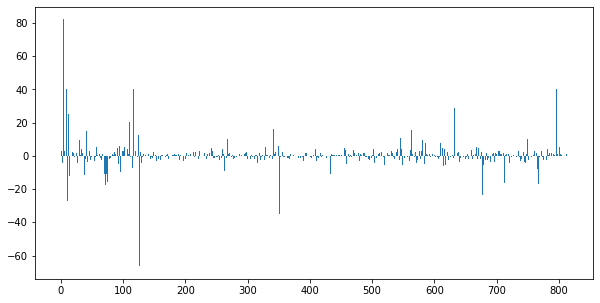

In [ ]:
InterLinRegression(x, y, 3)

In [ ]:
def RidgeImp(x, y, alpha,degree = 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 50)
    x_train_std, x_test_std = std(x_train, x_test)
    x_inter_train, x_inter_test = PolyFeat(x_train_std, x_test_std, degree)
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_inter_train, y_train)
    y_predicted = ridge_model.predict(x_inter_test)
    model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
    plt.figure(figsize=(10,5))
    plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
    print("koeficijenti: ", ridge_model.coef_)
  

Mean squared error:  1094.1475814412518
Mean absolute error:  19.843780432147753
Root mean squared error:  33.07790170856144
R2 score:  0.8722444168616897
R2 adjusted score:  0.8688143130811685
RSS 3790127.2221124964
        y      y_pred
0    28.0   25.817850
1   121.0   94.975131
2   141.0  120.449779
3   567.0  609.546278
4   139.0   81.282381
5   276.0  215.973663
6    15.0   15.586697
7    78.0   19.490826
8    86.0   98.215060
9    15.0   37.518421
10   18.0   24.467502
11   88.0  100.349078
12   52.0   55.067249
13  111.0  115.934508
14  112.0   70.370059
15   15.0   52.588322
16   42.0   39.748532
17   16.0    8.953772
18   40.0    9.866619
19  105.0   92.578572
koeficijenti:  [ 1.18868966e+01  1.58962769e+00  1.56416033e+00 -4.40909403e+00
  7.96710803e+01  8.93546879e+00  4.72486864e+00 -1.51300019e+01
 -1.73025517e+01  3.56042606e+01 -4.59603473e-01 -2.05440172e+01
  6.41688859e+00 -1.43992161e+00 -1.15366705e+01  1.49695708e+00
  1.17779567e+00 -7.59498637e-02 -6.05275239e-

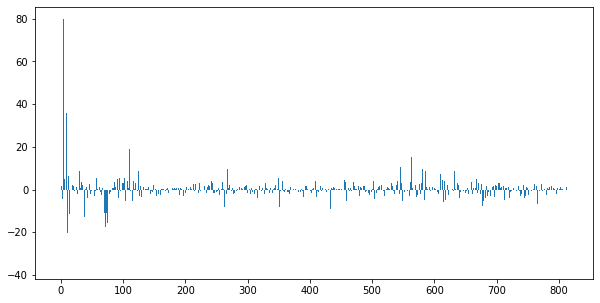

In [ ]:
RidgeImp(x, y, 6, 3)

In [ ]:
def LassoImp(x, y, alpha, degree = 2):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.10, random_state = 50)
    x_train_std, x_test_std = std(x_train, x_test)
    x_inter_train, x_inter_test = PolyFeat(x_train_std, x_test_std, degree)
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x_inter_train, y_train)
    y_predicted = lasso_model.predict(x_inter_test)
    model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
    plt.figure(figsize=(10,5))
    plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
    print("koeficijenti: ", lasso_model.coef_)

Mean squared error:  1343.613349373617
Mean absolute error:  22.43132666446576
Root mean squared error:  36.65533180007537
R2 score:  0.8431161299689248
R2 adjusted score:  0.8425098154953747
RSS 4654276.642230209
        y      y_pred
0    28.0   35.312953
1   121.0  104.474060
2   141.0  109.306853
3   567.0  610.263168
4   139.0   73.390780
5   276.0  159.330520
6    15.0    8.634572
7    78.0   34.445513
8    86.0   91.236858
9    15.0   33.933949
10   18.0   39.597458
11   88.0  106.368272
12   52.0   68.065560
13  111.0  113.257194
14  112.0   76.390468
15   15.0   59.267202
16   42.0   61.483961
17   16.0   24.312176
18   40.0   21.494836
19  105.0  104.094318
koeficijenti:  [ 9.06166256e-01 -5.98087699e+00  1.48266938e+00  2.25625817e+00
  8.73502269e+01  2.66760203e+00  7.40517053e+00  8.42848322e-01
 -2.99386845e+00  1.39391055e+01 -7.38046083e+00 -1.36364732e+01
 -3.45047414e-02  5.71263387e-02  1.03085561e+00 -6.02601669e-01
  6.42826537e-02 -5.41956468e-01 -8.87171088e-02 

,year,month,day,hour,PM2.5,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,2013,3,1,0,4.0,2.639057,20.0,5.703782,69.0,0.0,1023.0,-18.8,0.0,1,4.4
1,2013,3,1,1,4.0,2.564949,17.0,5.703782,72.0,0.0,1023.2,-18.2,0.0,2,4.7
2,2013,3,1,2,3.0,2.302585,19.0,5.703782,69.0,0.0,1023.5,-18.2,0.0,1,5.6
3,2013,3,1,3,3.0,1.945910,24.0,5.991465,62.0,0.0,1024.5,-19.4,0.0,0,3.1
4,2013,3,1,4,3.0,1.609438,14.0,5.991465,71.0,0.0,1025.2,-19.5,0.0,2,2.0


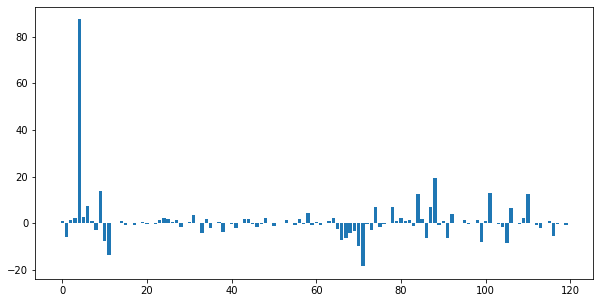

In [ ]:
LassoImp(x, y, 0.01, 2)
x.head()